# Practical 8
# Name : Devasy Patel

# Aim : To implement edge detection and point detection.

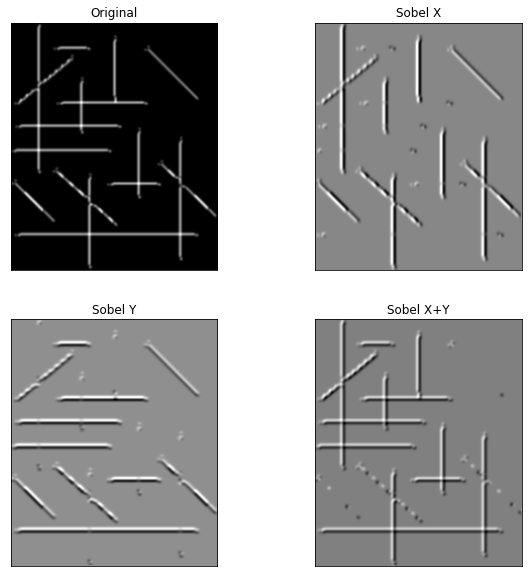

In [81]:
# line detection using sobel operator and prewitt operator

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('edgephoto.jpg',0)
# gaussian blur
img = cv2.GaussianBlur(img,(5,5),0)


#sobel operator
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)



final = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

fig = plt.figure(figsize=(10,10))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(final,cmap = 'gray')
plt.title('Sobel X+Y'), plt.xticks([]), plt.yticks([])
plt.show()

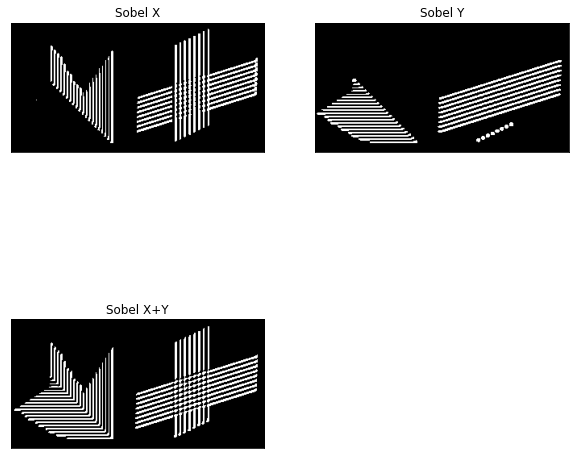

In [49]:
# apply thresholding on sobel x and sobel y
ret,thresh1 = cv2.threshold(sobelx,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(sobely,127,255,cv2.THRESH_BINARY)


# apply thresholding on sobel x+y
ret,thresh3 = cv2.threshold(final,127,255,cv2.THRESH_BINARY)

# print("Threshold value : ",thresh1, thresh2, thresh3)

fig = plt.figure(figsize=(10,10))
 
plt.subplot(2,2,1),plt.imshow(thresh1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(thresh2,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(thresh3,cmap = 'gray')
plt.title('Sobel X+Y'), plt.xticks([]), plt.yticks([])
plt.show()


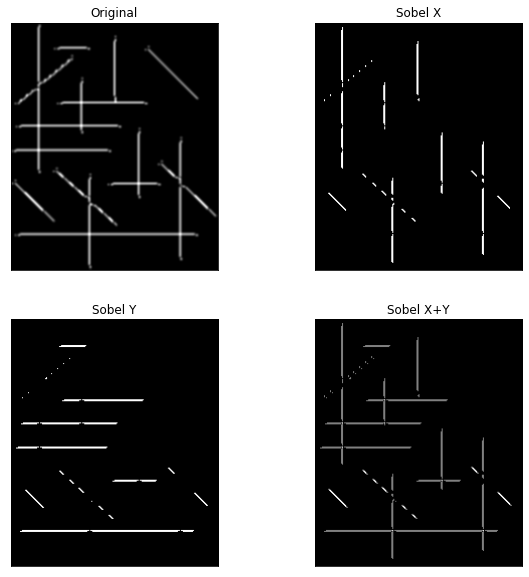

In [113]:
# now applying filter manually using convolution operation

def apply_filter(img, filter):
    # apply same padding to image
    img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
    h, w = img.shape
    out = np.zeros((h, w), dtype="float32")
    
    # loop over the image
    for y in np.arange(1, h - 1):
        for x in np.arange(1, w - 1):
            # apply convolution
            roi = img[y - 1:y + 2, x - 1:x + 2]
            k = (roi * filter).sum()
            out[y, x] = k
    # out = np.clip(out, 0, 255)
    # out = out.astype("uint8")
    return out
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

sobelx_img = apply_filter(img, sobelx)
sobelx_img = applyThreshold(sobelx_img, 240)
sobely_img = apply_filter(img, sobely)
sobely_img = applyThreshold(sobely_img, 240)
sobelxy_img = cv2.addWeighted(sobelx_img, 0.5, sobely_img, 0.5, 0)

fig = plt.figure(figsize=(10,10))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx_img,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely_img,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobelxy_img,cmap = 'gray')
plt.title('Sobel X+Y'), plt.xticks([]), plt.yticks([])
plt.show()

-366.0


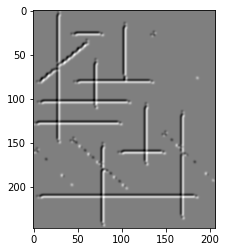

In [83]:
# now applying at 45 degree
filter = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]])
diag = apply_filter(img, filter)
print(min(diag.flatten()))
plt.imshow(diag, cmap="gray")

## Applying thresholding where if val < threshold, val = 0

367.0


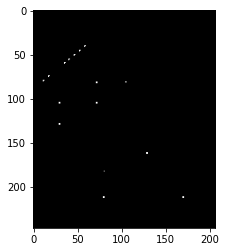

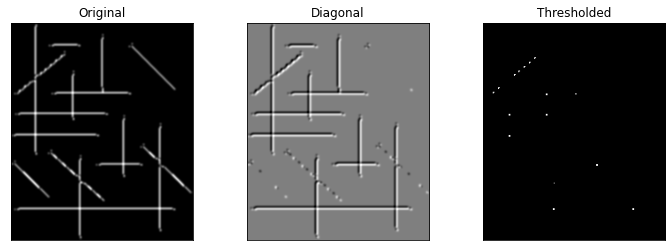

In [86]:
def applyThreshold(img, thresh):
    img[img < thresh] = 0
    img[img >= thresh] = 255
    return img


diag1 = applyThreshold(diag.copy(), 300)
plt.imshow(diag1, cmap="gray")
print(max(diag.flatten()))
# plot original, diagonal, thresholded
figure = plt.figure(figsize=(12,4))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(diag,cmap = 'gray')
plt.title('Diagonal'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(diag1,cmap = 'gray')
plt.title('Thresholded'), plt.xticks([]), plt.yticks([])
plt.show()

-414.0 414.0


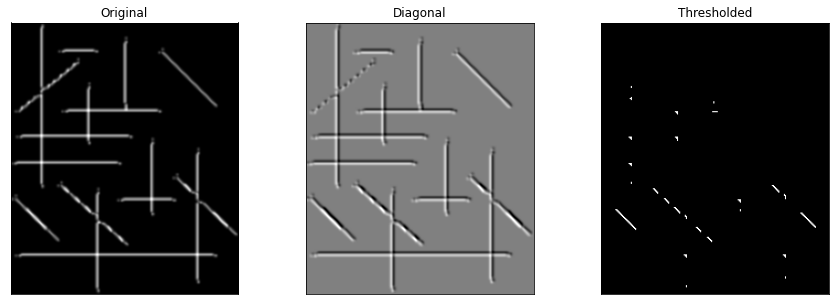

In [90]:
# now another diagonal
filter = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
diag = apply_filter(img, filter)
diag1 = applyThreshold(diag.copy(), 300)
print(min(diag.flatten()), max(diag.flatten()))
figure = plt.figure(figsize=(15,5))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(diag,cmap = 'gray')
plt.title('Diagonal'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(diag1,cmap = 'gray')
plt.title('Thresholded'), plt.xticks([]), plt.yticks([])
plt.show()

# Prewitt operator

-310.0 240.0


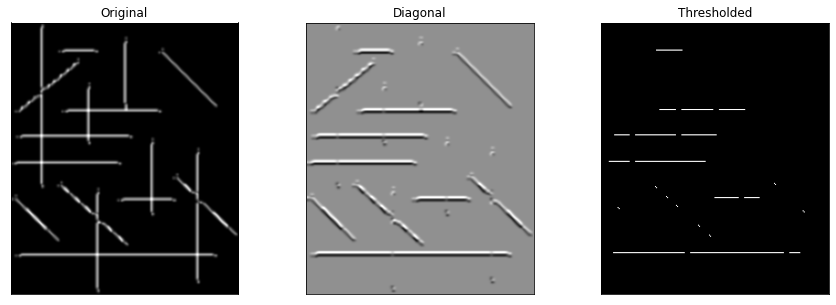

In [108]:
filter = np.array([[-1, -1, -1], [0,0,0], [1,1,1]])
diag = apply_filter(img, filter)
diag1x = applyThreshold(diag.copy(), 230)
print(min(diag.flatten()), max(diag.flatten()))
figure = plt.figure(figsize=(15,5))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(diag,cmap = 'gray')
plt.title('Diagonal'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(diag1x,cmap = 'gray')
plt.title('Thresholded'), plt.xticks([]), plt.yticks([])

plt.show()


# Vertical Prewwit operator

-240.0 279.0


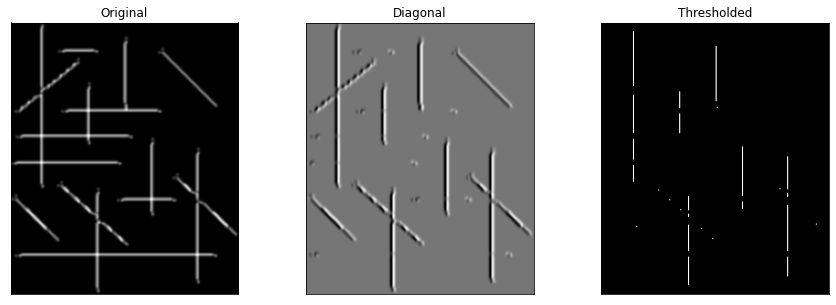

In [109]:
filter = np.array([[1, 0, -1], [1,0,-1], [1,0,-1]])
diag = apply_filter(img, filter)
diag1y = applyThreshold(diag.copy(), 220)
print(min(diag.flatten()), max(diag.flatten()))
figure = plt.figure(figsize=(15,5))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(diag,cmap = 'gray')
plt.title('Diagonal'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(diag1y,cmap = 'gray')
plt.title('Thresholded'), plt.xticks([]), plt.yticks([])

plt.show()


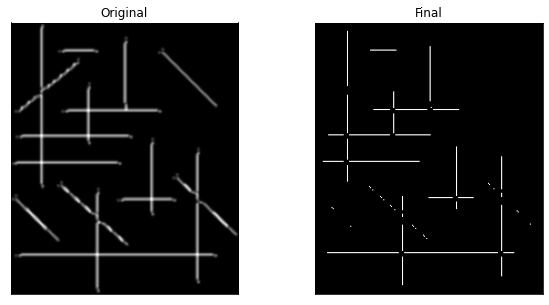

In [110]:
# adding both the thresholded image
final = (diag1x+diag1y)
# before after
figure = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(final,cmap = 'gray')
plt.title('Final'), plt.xticks([]), plt.yticks([])
plt.show()
